In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### train test split
from sklearn.model_selection import train_test_split
###scaling
from sklearn.preprocessing import StandardScaler

#Creating a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

### metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import warnings
warnings.filterwarnings("ignore")

# DATA

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.drop(['education'],axis=1,inplace=True) # We don't need this column

## Data Pre-processing

In [6]:
# Find NA
df.isna().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Drop NA
df.dropna(axis=0,inplace=True)
df.shape

(3751, 15)

## Visualization

Text(0.5, 1.0, 'Box Plot')

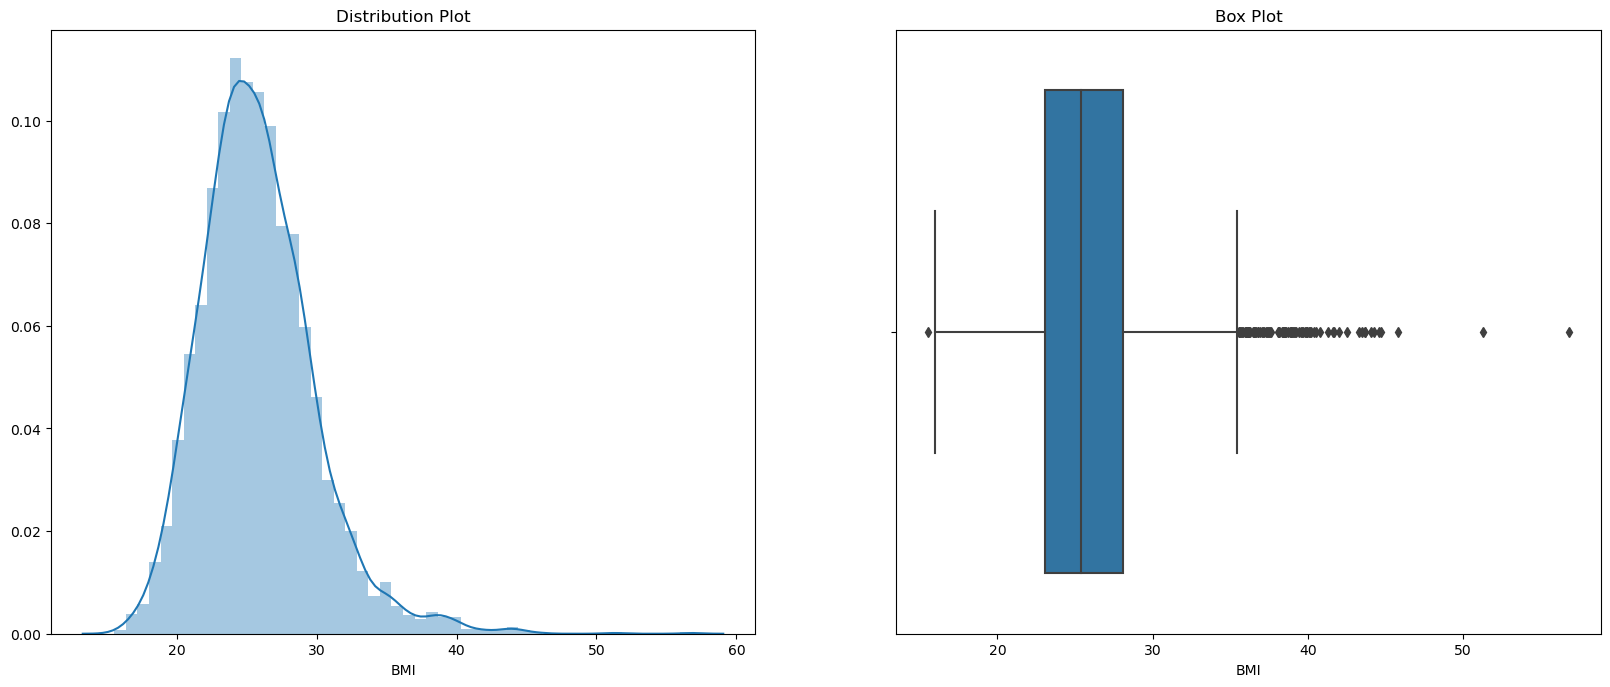

In [8]:
#BMI Distribution Plot
plt.figure(figsize=(20,8),dpi=100)

plt.subplot(1,2,1)
#BMI Distribution Plot
sns.distplot(df.BMI)
plt.title('Distribution Plot')

plt.subplot(1,2,2)
#BMI Box Plot
sns.boxplot(x=df.BMI) # or y = df.BMI
plt.title('Box Plot')

Text(0.5, 1.0, 'Distribution of age vs sex ')

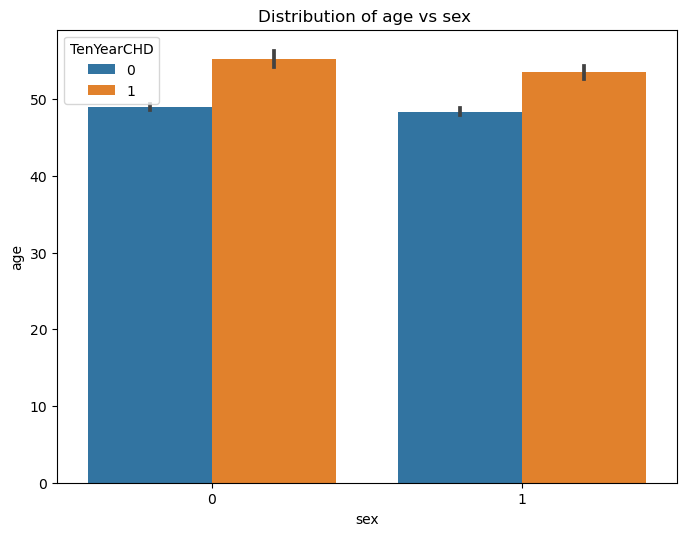

In [9]:
#Bar plot of age vs sex
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=df,y='age',x='sex',hue='TenYearCHD')
plt.title('Distribution of age vs sex ')
#1 = male, 0 = female

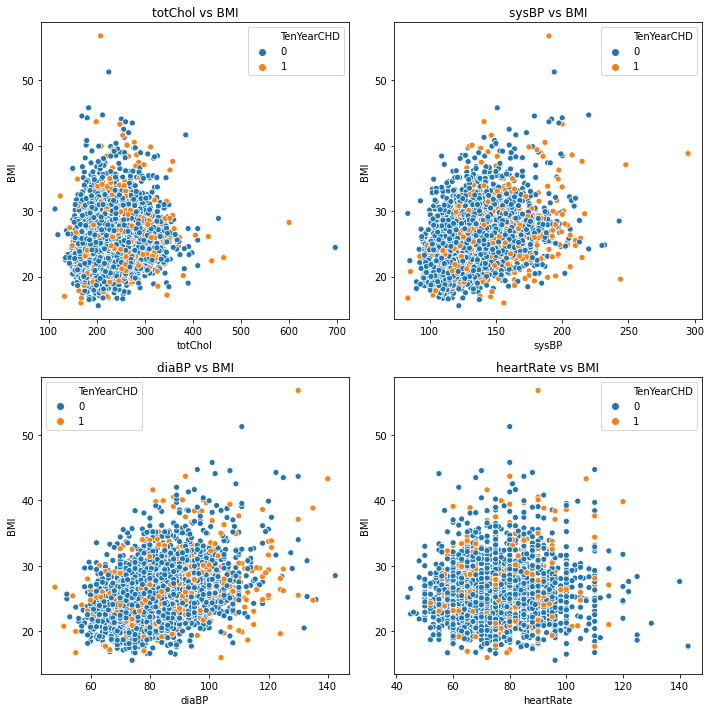

In [10]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    sns.scatterplot(df[x],df['BMI'],hue=df['TenYearCHD'])
    plt.title(x+' vs BMI')
    plt.ylabel('BMI')
    plt.xlabel(x)

plt.figure(figsize=(10,10))

scatter('totChol', 1)
scatter('sysBP', 2)
scatter('diaBP', 3)
scatter('heartRate', 4)
plt.tight_layout()

## Train | Test Split

In [11]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3000, 14) (3000,)
Test set: (751, 14) (751,)


## Creating the Model

In [15]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [16]:
# model
model = Sequential()

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

## Training the Model


In [17]:
#callbacks
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [18]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=300,verbose=1,callbacks=[early_stop])

Epoch 1/300
24/24 [==============================] - 0s 7ms/step - loss: 0.6560 - val_loss: 0.5967
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5762 - val_loss: 0.5195
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5246 - val_loss: 0.4558
Epoch 4/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4758 - val_loss: 0.4157
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4519 - val_loss: 0.3950
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4401 - val_loss: 0.3855
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4320 - val_loss: 0.3821
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4342 - val_loss: 0.3782
Epoch 9/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4179 - val_loss: 0.3742
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4143 - val_loss: 0.3717
Epoch 11/

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dropout (Dropout)            (None, 14)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 645
Trainable params: 645
Non-trainable params: 0
__________________________________________________________

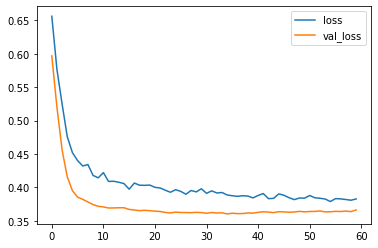

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Predicting the Model

In [21]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       645
           1       0.29      0.02      0.04       106

    accuracy                           0.85       751
   macro avg       0.57      0.51      0.48       751
weighted avg       0.78      0.85      0.80       751



In [23]:
acc_score = accuracy_score(y_test,predictions)
print('Accuracy Score:',acc_score)

Accuracy Score: 0.8548601864181092


In [24]:
#Prediction function
def CHD_pred(value):
    actual_value= df['TenYearCHD'][value]
    predict = df.drop('TenYearCHD',axis=1).iloc[value]
    predict = scaler.transform(predict.values.reshape(-1,14))
    predict = model.predict_classes(predict)
    return print(f'actual CHD:{actual_value}\npredicted CHD:{predict}')



# 1 : Heart Attack Risk , 0 : No Heart Attack Risk

In [28]:
CHD_pred(29)

actual CHD:0
predicted CHD:[[0]]


In [ ]:
# model.save('my_model.h5')